In [40]:
import os
from PIL import Image
from numpy import asarray
import numpy as np
import sys
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc,accuracy_score,classification_report
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

In [37]:
#helper function to convert images into numpy arrays
#External reference used https://pillow.readthedocs.io/en/3.1.x/reference/Image.html

def readInput(folderList):
    #setting height and width of the images
    width = 100
    height = 100
    
    #setting the print option for numpy array
    np.set_printoptions(threshold=sys.maxsize)
    
    #setting path variable to store the folder path of images folder
    npath =  os.getcwd() + '\Dataset'

    
    #creating empty numpy arrays to store dependednt and independent variables
    X = np.empty((80,10000))
    yfinal = np.empty((80,1))
    
    #used to store lables of the images
    labelList = []
    
    images_data = []
    
    #setting path variable to store the folder path of images available in the first folder
    strPath = npath + '\\' + folderList[0]   + '\\'
    
    #iterate over the path of image folder,open the image file,convert into grayscale format and setting the image height and width
    # r=root, d=directories, f = files
    for r, d, f in os.walk(strPath):
        for file in f:
            image = Image.open(r+file)
            image = image.convert(mode = 'L')
            image = image.resize((width,height))

            #converting the image varibale value into an array
            data = asarray(image)
            #collapsing the data variable value into one dimension
            data = data.flatten()
            #append the data variable value into images_data list
            images_data.append(data)
            #storing  images label in a list
            labelList.append(folderList[0])

    

    #creating numpy array from the images_data list
    images = np.array(images_data)
    
    # creating a new array y of given shape and type and filled with fill value as image label
    y = np.full((20,),folderList[0])
        
    
    #creating an empty list to store the values for second fruit images
    images_data2 = []
    
    
    #setting path variable to store the folder path of images available in the second folder
    strPath = npath  + '\\' + folderList[1] + '\\'
    
    #iterate over the path of image folder,open the image file,convert into grayscale format and setting the image height and width
    # r=root, d=directories, f = files
    for r, d, f in os.walk(strPath):
        for file in f:
            image = Image.open(r+file)
            image = image.convert(mode = 'L')
            image = image.resize((width,height))

            #converting the image varibale value into an array
            data = asarray(image)
            #collapsing the data variable value into one dimension
            data = data.flatten()
            #append the data variable value into images_data2 list
            images_data2.append(data)
            #storing  images label in a list
            labelList.append(folderList[1])


    # creating numpy array from the images_data list
    images2 = np.array(images_data2)

    # creating a new array y of given shape and type and filled with fill value as image label
    y2 = np.full((20,),folderList[1])

    #Stacking images and images2 arrays in sequence vertically (row wise) and storing the result in images_final.
    images_final = np.vstack((images,images2))
    
    #Stacking y and y2 arrays in sequence horizontally (column wise) and storing the result in y_final.Both y and y2 are 1d array
    y_final = np.hstack((y,y2))

    #storing images_final and y_final value in X and y respectively
    X = images_final
    y = y_final
    
    #looping through remaining folders list
    #and converting individual folder's images into grayscale format and setting their height and width
    for i in range(2,len(folderList)):
    
        #setting path variable to store the folder path of images available in the remaining folders
        path = npath + '\\' + folderList[i]  + '\\'
        
        #creating an empty list to store the values for remaining fruit images
        images_data = []
        
        #iterate over the path of image folder and open the image file,convert the image file into grayscale format and setting the image height and width
        # r=root, d=directories, f = files
        for r, d, f in os.walk(path):
            for file in f:
                image = Image.open(r+file)
                image = image.convert(mode = 'L')
                image = image.resize((width,height))

                #converting the image varibale value into an array
                data = asarray(image)
                #collapsing the data variable value into one dimension
                data = data.flatten()
                #append the data variable value into images_data list
                images_data.append(data)
                #storing  images label in a list
                labelList.append(folderList[i])
        
        #creating numpy array from the images_data list
        images2 = np.array(images_data)
        
        #creating a new array y of given shape and type and filled with fill value as image label
        y2 = np.full((20,),folderList[i])
        
        #Stacking images and images2 arrays in sequence vertically (row wise) and storing the result in images_final
        images_final = np.vstack((images_final,images2))
        
        #Stacking y and y2 arrays in sequence horizontally (column wise) and storing the result in y_final.Both y and y2 are 1d array
        y_final = np.hstack((y_final,y2))
    
    #storing images_final and y_final value in X and Y respectively
    X = images_final
    #resizing the Y array to the shape of X
    Y = y_final.reshape(80,1)
    #resizing the labels array to the shape of X
    labels = np.array(labelList).reshape(80,1)
    
    
    return (X,Y,labels)

In [31]:
#list to store different image type 
list_folderList = ['oranges','avacado','pineapple','strawberries']

#storing return values from readInput into variables X,y and labels
X,y,labels = readInput(list_folderList)

In [38]:
#using PCA to reduce dimension of dataset X

#Setting the number of desired components
pca = PCA(n_components=20, random_state=0)

#fit the PCA model on X and apply the dimensionality reduction on X
projection_X = pca.fit_transform(X)         

In [41]:
#performing simple train and test

#Splitting training data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(projection_X, y.ravel(),stratify=y,test_size=0.3, random_state=0)

#Creating model of type StandardScaler to normalize train and test dataset
scaler = StandardScaler()

#Compute mean and standard deviation from X_train to be later used for scaling both X_train and X_test
scaler.fit(X_train)

#Perform standarization of X_train
X_train = scaler.transform(X_train)

#Perform standarization of X_test
X_test = scaler.transform(X_test)

#Creating RandomForestClassifier model with number of estimators = 33
model = RandomForestClassifier(n_estimators = 20,random_state=0)

#Fit the model to X_train,y_train data.
model.fit(X_train,y_train)

#Predict labels for X_test data.
y_pred = model.predict(X_test)

In [42]:
#Evaluating accuracy of the model
accuracy_simple_test_train = accuracy_score(y_test,y_pred, normalize = True) * 100
print("Accuracy for simple train/test model {0}".format(accuracy_simple_test_train))

#reporting accuracy, precision, recall and F1 score
print(classification_report(y_test,y_pred))

Accuracy for simple train/test model 91.66666666666666
              precision    recall  f1-score   support

     avacado       0.86      1.00      0.92         6
     oranges       0.83      0.83      0.83         6
   pineapple       1.00      1.00      1.00         6
strawberries       1.00      0.83      0.91         6

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



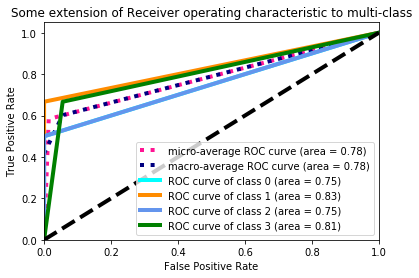

In [47]:
#Use ROC Curve and AUC to evaluate the perfomance of your models
#use for mutliclass classification 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

# 0 - avocardo
# 1 - pineapple
# 2 - orange 
# 3 - strawberry

# Binarize the output
y_binary = label_binarize(labels,classes=['oranges','avacado','pineapple','strawberries'])
n_classes = y_binary.shape[1]

# splitting dataset into training and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(projection_X, y_binary,stratify=y_binary,test_size=0.3, random_state=0)


#creating model of type StandardScaler to normalize train and test dataset
scaler = StandardScaler()

#compute mean and standard deviation from X_train to be later used for scaling both X_train_1 and X_test_1
scaler.fit(X_train_1)

#Perform standarization of X_train_1
X_train_1 = scaler.transform(X_train_1)

#Perform standarization of X_test_1
X_test_1 = scaler.transform(X_test_1)

# Predict each class against the other
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 33,random_state=0))

#Fit the model to X_train_1,y_train_1 and predicitng labels for X_test_1 dataset
y_score = classifier.fit(X_train_1,y_train_1).predict(X_test_1)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_1.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 4
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [44]:
#use stratify cross validation instead of simple train and test model.
cv = StratifiedKFold(n_splits = 5,random_state = 0,shuffle = True)
accuracy_RandomForest = cross_val_score(model, projection_X, y.ravel(), cv=cv, scoring='accuracy')
print("Cross Validation Scores for Random Forest: {}".format(accuracy_RandomForest))
print("Mean Accuracy Score for Random Forest: {}".format(np.mean(accuracy_RandomForest)))

Cross Validation Scores for Random Forest: [0.9375 0.875  0.9375 0.9375 0.9375]
Mean Accuracy Score for Random Forest: 0.925


In [45]:
#Take advantage of gridsearch with cross validation in your work
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#creating parameters dictionary to be used for GridSearchCV

param_grid = [
              { 
               'n_estimators': [10,20,40,50],
               'max_features': ['sqrt'],
               'criterion' :['gini'],
               'max_depth':[5,10,20,30,50]
              }
           ]

# initialize the model
model = RandomForestClassifier(random_state=0)

#creating desired number of stratified partitions
cv = StratifiedKFold(n_splits=5,random_state=0,shuffle=True)

#testing the peformance of different hyperparameters individually using cross validation and selecting the best hyperparamter
grid = GridSearchCV(model,param_grid=param_grid, cv = cv, scoring='accuracy')


#Fit the model to train data
grid.fit(X_train,y_train)

#Predict labels for test data.
y_pred_new = grid.predict(X_test)


C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [46]:
#Evaluating accuracy of the model using gridsearch with cross validation approach
accuracy_simple_test_train = accuracy_score(y_test,y_pred_new, normalize = True) * 100

print("Accuracy of the Random Forest Classifier using gridsearch with cross validation approach {0}".format(accuracy_simple_test_train))

print(classification_report(y_test,y_pred_new))

Accuracy of the Random Forest Classifier using gridsearch with cross validation approach 91.66666666666666
              precision    recall  f1-score   support

     avacado       0.86      1.00      0.92         6
     oranges       0.86      1.00      0.92         6
   pineapple       1.00      0.83      0.91         6
strawberries       1.00      0.83      0.91         6

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24

